In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
beer_test = pd.read_csv("data/beer_test.csv")

In [3]:
sampleSubmission = pd.read_csv("data/sampleSubmission.csv")

In [4]:
id_store_sku = pd.read_csv("data/id_store_sku.csv")
len(id_store_sku["Store"].unique())

267

In [5]:
sku_features = pd.read_csv("data/sku_features.csv")
sku_features

,SKU,Segment,Pack,Product,Brand,Volume
0,"_Carlsberg Can 0,45",MainStream,Can,Lager,Carlsberg,0.45
1,"_Flash Up Energy PET 0,5",High Margin,PET,Energy-drink,Flash,0.50
2,"_Holsten Bottle 0,47",Premium,Bottle,Lager,Holsten,0.50
3,"_Tuborg Green Can 0,45",Premium,Can,Lager,Tuborg,0.45
4,"_Tuborg Green Bottle 0,48",Premium,Bottle,Lager,Tuborg,0.50
5,"_Zatecky Gus Can 0,45",Premium,Can,Lager,Zatecky Gus,0.45
6,"_Zatecky Gus Bottle 0,48",Premium,Bottle,Lager,Zatecky Gus,0.50
7,"_Zatecky Gus PET 1,42",Premium,PET,Lager,Zatecky Gus,1.50
8,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
9,"_Baltika №3 Can 0,45",MainStream,Can,Lager,Baltika №3,0.45


In [6]:
beer_train = pd.read_csv("data/beer_train.csv")
beer_train

,Date,ts_id,isPromo,Sales
0,2015-06-15,0,0.0,0.100
1,2015-06-15,1,0.0,0.350
2,2015-06-15,2,1.0,0.600
3,2015-06-15,3,1.0,0.350
4,2015-06-15,4,0.0,0.150
...,...,...,...,...
1382316,2017-06-14,2059,0.0,0.405
1382317,2017-06-14,2060,0.0,0.180
1382318,2017-06-14,2061,1.0,0.810
1382319,2017-06-14,2062,1.0,0.360


In [7]:
id_store_sku["ts_id"].unique()

array([   0,    1,    2, ..., 2061, 2062, 2063], dtype=int64)

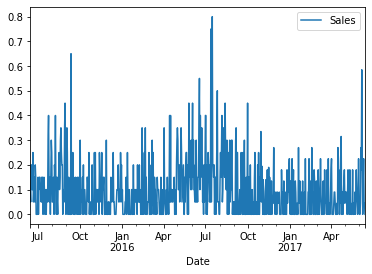

In [8]:
beer_train = pd.read_csv("data/beer_train.csv")
ts_id0 = beer_train[beer_train['ts_id']==0]
date_time = pd.to_datetime(ts_id0.pop('Date'), format='%Y-%m-%d')
plot_cols = ['Sales']
plot_features = ts_id0[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [9]:
result = pd.merge(id_store_sku, sku_features, on="SKU")
result

,ts_id,Store,SKU,Segment,Pack,Product,Brand,Volume
0,0,3301,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
1,6,3302,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
2,15,3303,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
3,22,3304,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
4,29,3305,"_Baltika №0 Can 0,45",Premium,Can,Non-alco,Baltika №3,0.45
...,...,...,...,...,...,...,...,...
1939,1248,7978,"_Baltika Cooler Bottle 0,47",MainStream,Bottle,Lager,Baltika Cooler,0.50
1940,1409,8328,"_Baltika Cooler Bottle 0,47",MainStream,Bottle,Lager,Baltika Cooler,0.50
1941,1262,7979,"_Baltika Draught PET 0,47",Premium,PET,Other,Baltika Draught,0.50
1942,1416,8328,"_Firmennoe PET 1,42",Premium,PET,Other,Firmennoe,1.50


In [10]:
final_result = pd.merge(beer_train, result, on="ts_id")
final_result[final_result["SKU"]=="	_Baltika №0 Can 0,45"]
storesOr = final_result["Store"].unique()
stores =storesOr[:5]
len(storesOr)

256

Store 3301
Store 3302
Store 3303
Store 3304
Store 3305


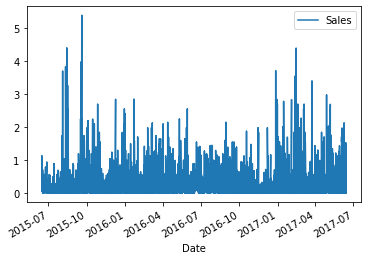

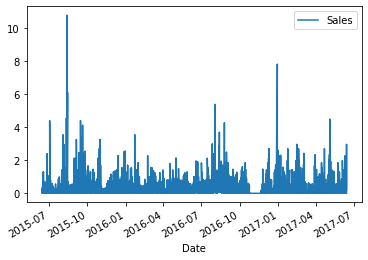

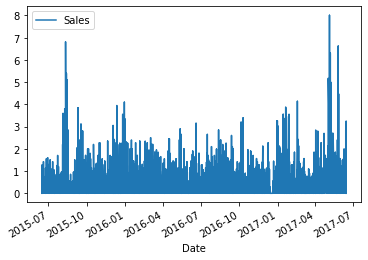

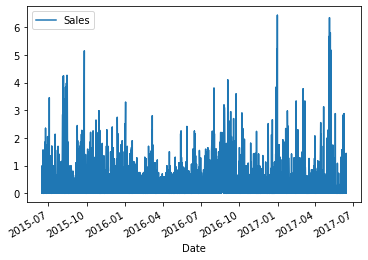

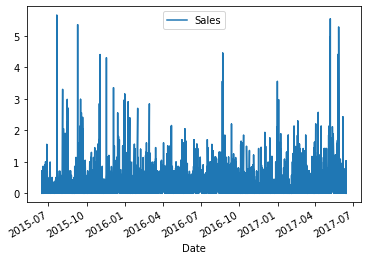

In [11]:
for s in stores:
    ts_id0 = final_result[final_result['Store']==s]
    print("Store",s)
    date_time = pd.to_datetime(ts_id0.pop('Date'), format='%Y-%m-%d')
    plot_cols = ['Sales']
    plot_features = ts_id0[plot_cols]
    plot_features.index = date_time
    _ = plot_features.plot(subplots=True)

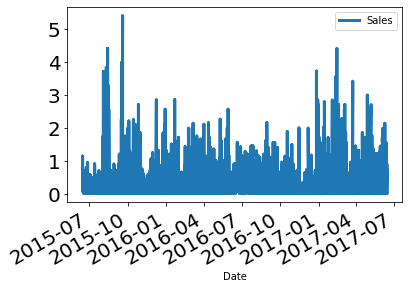

In [12]:
ts_id0 = final_result[final_result['Store']==stores[0]]
date_time = pd.to_datetime(ts_id0.pop('Date'), format='%Y-%m-%d')
plot_cols = ['Sales']
plot_features = ts_id0[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(linewidth =3, fontsize=20,subplots=True)

## Preprocesing

In [13]:
import seaborn as sns
import string
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
print('Number of Training Examples = {}'.format(final_result.shape[0]))
print('Training X Shape = {}'.format(final_result.shape))
print('Training y Shape = {}'.format(final_result['Sales'].shape[0]))
print('Train columns \n', list(final_result.columns))

Number of Training Examples = 1382321
Training X Shape = (1382321, 11)
Training y Shape = 1382321
Train columns 
 ['Date', 'ts_id', 'isPromo', 'Sales', 'Store', 'SKU', 'Segment', 'Pack', 'Product', 'Brand', 'Volume']


In [15]:
print(final_result.info())
final_result.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382321 entries, 0 to 1382320
Data columns (total 11 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Date     1382321 non-null  object 
 1   ts_id    1382321 non-null  int64  
 2   isPromo  1382321 non-null  float64
 3   Sales    1382321 non-null  float64
 4   Store    1382321 non-null  object 
 5   SKU      1382321 non-null  object 
 6   Segment  1382321 non-null  object 
 7   Pack     1382321 non-null  object 
 8   Product  1382321 non-null  object 
 9   Brand    1382321 non-null  object 
 10  Volume   1382321 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 126.6+ MB
None


,Date,ts_id,isPromo,Sales,Store,SKU,Segment,Pack,Product,Brand,Volume
735299,2017-03-20,1121,0.0,0.00,7639,"_Tuborg Green Bottle 0,48",Premium,Bottle,Lager,Tuborg,0.50
491977,2015-06-29,789,1.0,0.25,6571,"_Baltika №7 Can 0,45",Premium,Can,Lager,Baltika №7,0.45
637777,2016-05-25,988,0.0,0.00,7510,"_Baltika №9 Can 0,45",MainStream,Can,Lager,Baltika №9,0.45


In [16]:
non_numeric_features = ['Store', 'SKU', 'Segment', 'Pack', 'Product', 'Brand']

for feature in non_numeric_features:        
    final_result[feature] = LabelEncoder().fit_transform(final_result[feature])
    final_result[feature] = LabelEncoder().fit_transform(final_result[feature])

In [17]:
aux=final_result.sample(100)
aux.columns

Index(['Date', 'ts_id', 'isPromo', 'Sales', 'Store', 'SKU', 'Segment', 'Pack',
       'Product', 'Brand', 'Volume'],
      dtype='object')

In [18]:
date_time = pd.to_datetime(final_result.pop('Date'), format='%Y-%m-%d')
final_result['Date'] = date_time
final_result

,ts_id,isPromo,Sales,Store,SKU,Segment,Pack,Product,Brand,Volume,Date
0,0,0.0,0.100,0,2,2,1,2,2,0.45,2015-06-15
1,0,0.0,0.050,0,2,2,1,2,2,0.45,2015-06-16
2,0,0.0,0.200,0,2,2,1,2,2,0.45,2015-06-17
3,0,0.0,0.200,0,2,2,1,2,2,0.45,2015-06-18
4,0,0.0,0.100,0,2,2,1,2,2,0.45,2015-06-19
...,...,...,...,...,...,...,...,...,...,...,...
1382316,2063,0.0,0.315,255,6,1,1,1,4,0.45,2017-06-10
1382317,2063,0.0,0.225,255,6,1,1,1,4,0.45,2017-06-11
1382318,2063,0.0,0.315,255,6,1,1,1,4,0.45,2017-06-12
1382319,2063,0.0,0.585,255,6,1,1,1,4,0.45,2017-06-13


In [19]:
final_result[final_result['Store']==0]

,ts_id,isPromo,Sales,Store,SKU,Segment,Pack,Product,Brand,Volume,Date
0,0,0.0,0.100,0,2,2,1,2,2,0.45,2015-06-15
1,0,0.0,0.050,0,2,2,1,2,2,0.45,2015-06-16
2,0,0.0,0.200,0,2,2,1,2,2,0.45,2015-06-17
3,0,0.0,0.200,0,2,2,1,2,2,0.45,2015-06-18
4,0,0.0,0.100,0,2,2,1,2,2,0.45,2015-06-19
...,...,...,...,...,...,...,...,...,...,...,...
4381,5,0.0,0.000,0,8,1,2,3,6,1.50,2017-06-10
4382,5,0.0,0.000,0,8,1,2,3,6,1.50,2017-06-11
4383,5,0.0,0.000,0,8,1,2,3,6,1.50,2017-06-12
4384,5,0.0,0.568,0,8,1,2,3,6,1.50,2017-06-13


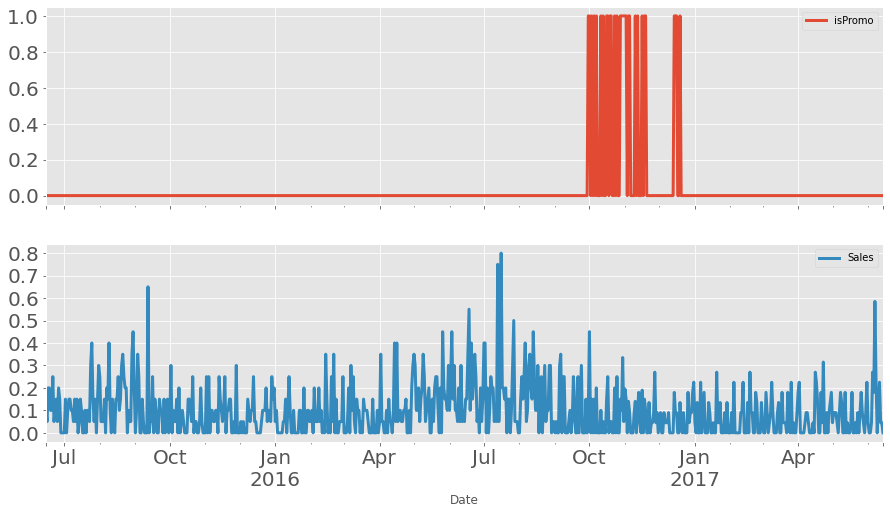

In [20]:
# aux.plot(figsize=(20,10),linewidth =4, fontsize=20,subplots=True)
# plt.xlabel('Date',fontsize=20)
aux=final_result[final_result['ts_id']==0]
date_time = pd.to_datetime(aux.pop('Date'), format='%Y-%m-%d')
plot_cols = ['isPromo','Sales']
plot_features = aux[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(figsize=(15,8),linewidth =3, fontsize=20,subplots=True)

### Trend

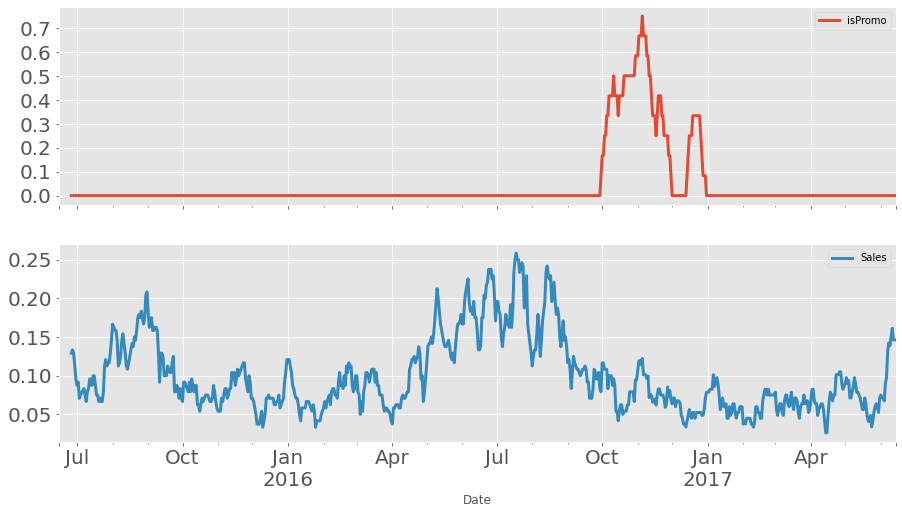

In [21]:
# date = aux[['Sales']]
# date.rolling(12).mean().plot(figsize=(20,10),linewidth =4, fontsize=20)
# plt.xlabel('Date',fontsize=20)

aux=final_result[final_result['ts_id']==0]
date_time = pd.to_datetime(aux.pop('Date'), format='%Y-%m-%d')
plot_cols = ['isPromo','Sales']
plot_features = aux[plot_cols]
plot_features.index = date_time
_ = plot_features.rolling(12).mean().plot(figsize=(15,8),linewidth =3, fontsize=20,subplots=True)

### Seasonality

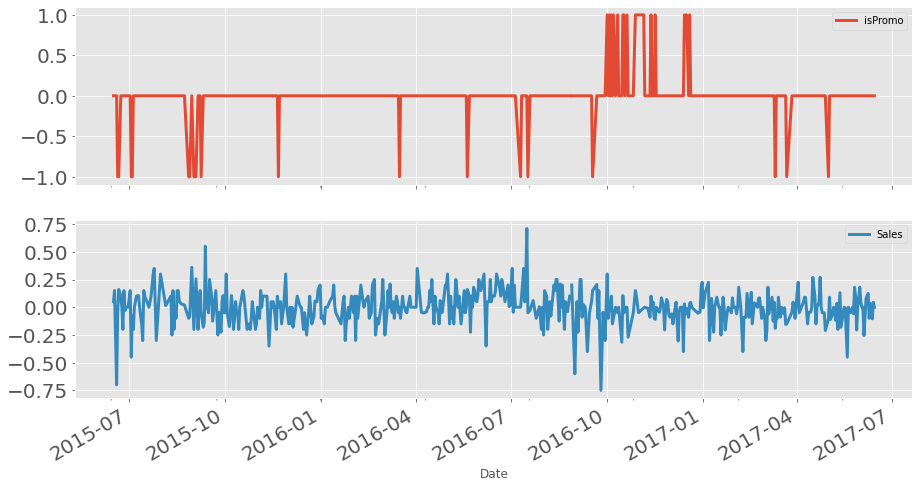

In [22]:
# date.diff().plot(figsize=(20,10),linewidth =4, fontsize=20)
# plt.xlabel('Date',fontsize=20)

aux=final_result[final_result['ts_id']==0].sample(500)
date_time = pd.to_datetime(aux.pop('Date'), format='%Y-%m-%d')
plot_cols = ['isPromo','Sales']
plot_features = aux[plot_cols]
plot_features.index = date_time
_ = plot_features.diff().plot(figsize=(15,8),linewidth =3, fontsize=20,subplots=True)

# Special Beer

In [30]:
aux=final_result[final_result['ts_id']==0] 
aux.pop('ts_id')
aux.pop('SKU')
aux.pop('Segment')
aux.pop('Pack')
aux.pop('Product')
aux.pop('Brand')
aux.pop('Volume')
aux.pop('Store')
aux.set_index('Date',inplace=True)
aux.head()

,isPromo,Sales
Date,,
2015-06-15,0.0,0.10
2015-06-16,0.0,0.05
2015-06-17,0.0,0.20
2015-06-18,0.0,0.20
2015-06-19,0.0,0.10


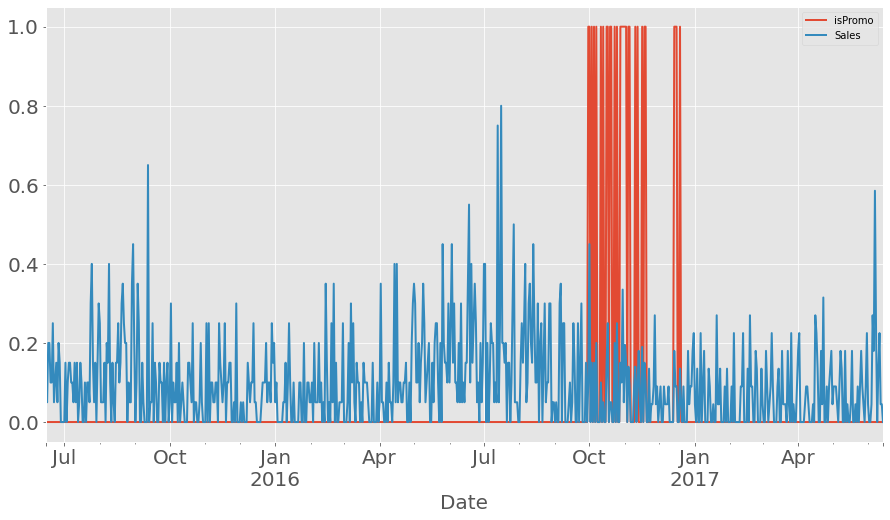

In [23]:
aux.plot(figsize=(15,8),linewidth =2, fontsize=20)
plt.xlabel('Date',fontsize=20);

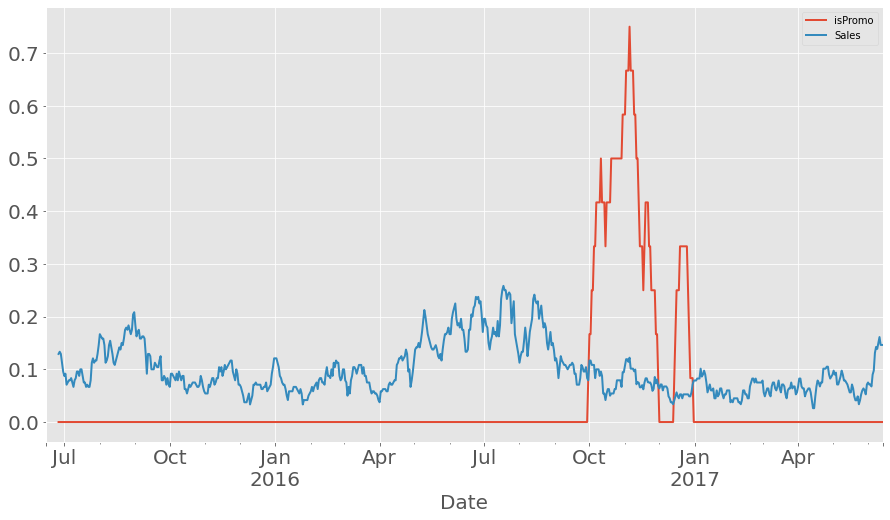

In [24]:
# TRend
aux.rolling(12).mean().plot(figsize=(15,8),linewidth =2, fontsize=20)
plt.xlabel('Date',fontsize=20);

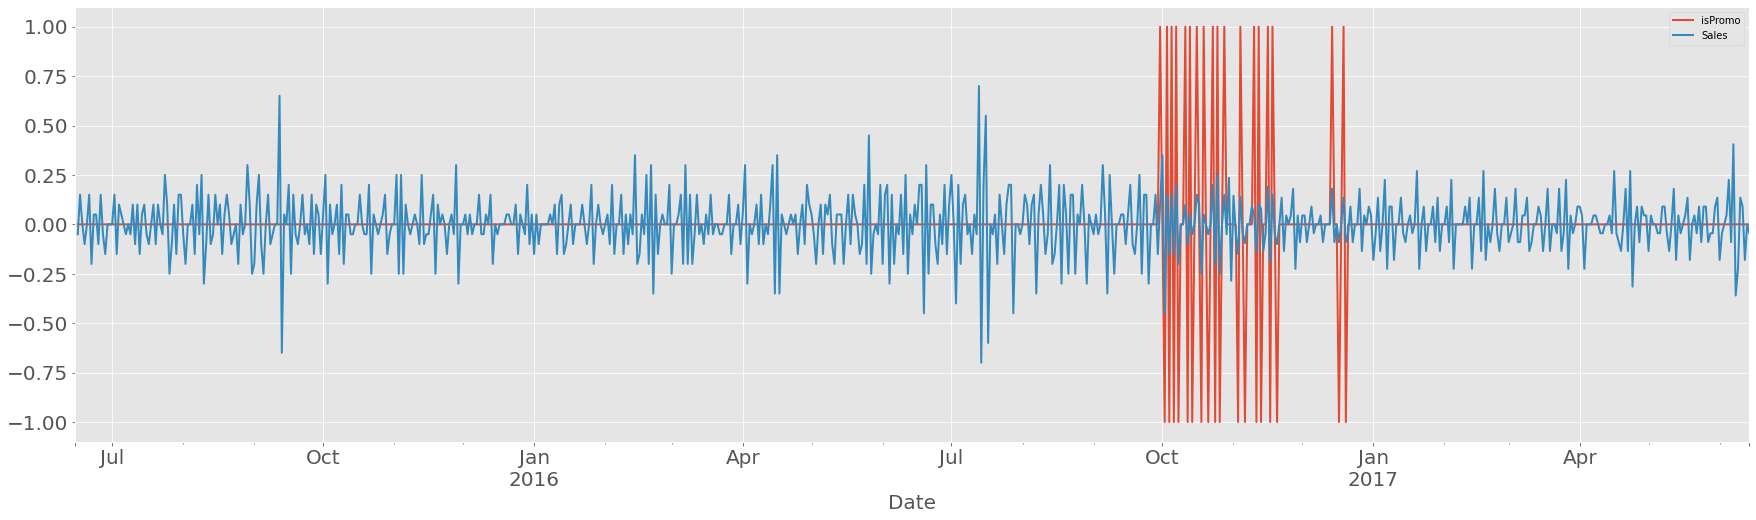

In [25]:
# Seasonality
aux.diff().plot(figsize=(30,8),linewidth =2, fontsize=20)
plt.xlabel('Date',fontsize=20);

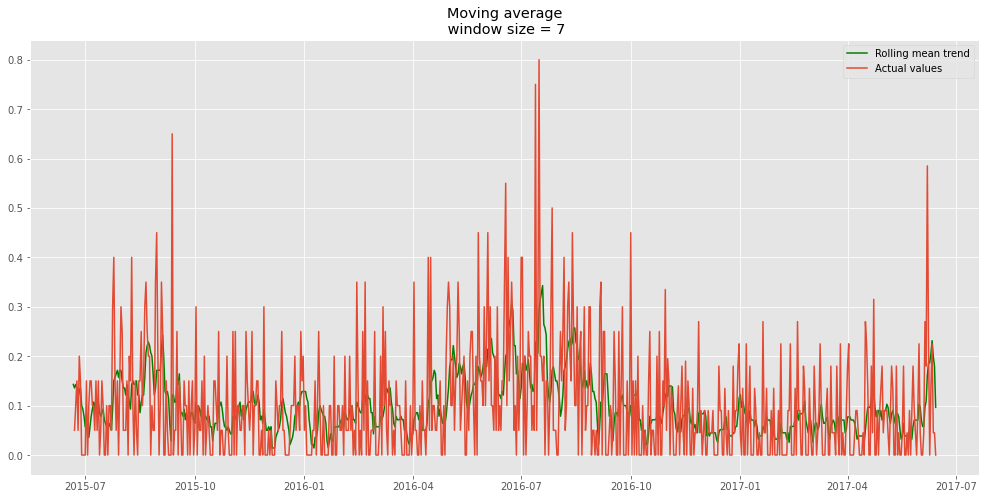

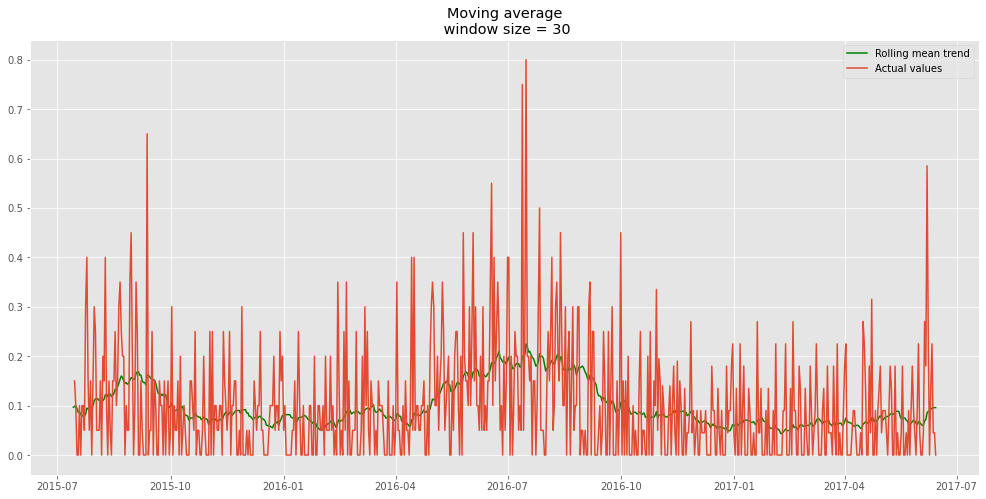

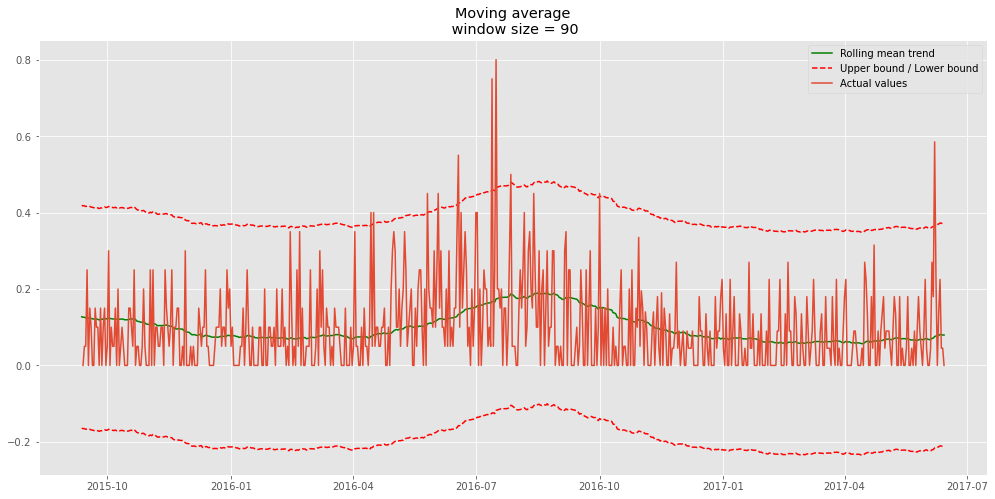

In [26]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 7 days (by week)
plot_moving_average(aux.Sales, 7)

#Smooth by the previous month (30 days)
plot_moving_average(aux.Sales, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(aux.Sales, 90, plot_intervals=True)

important link => https://medium.com/swlh/time-series-analysis-7006ea1c3326

#### Exponential smoothing to see if it can pick up a better trend

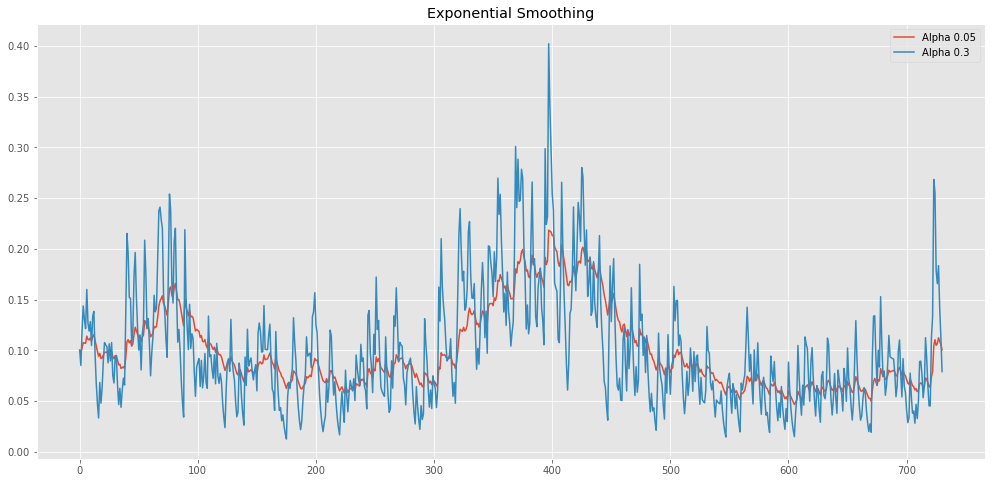

In [27]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    # Uncoment the next line if you want to see how the data actually behaves
#     plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(aux.Sales, [0.05, 0.3])

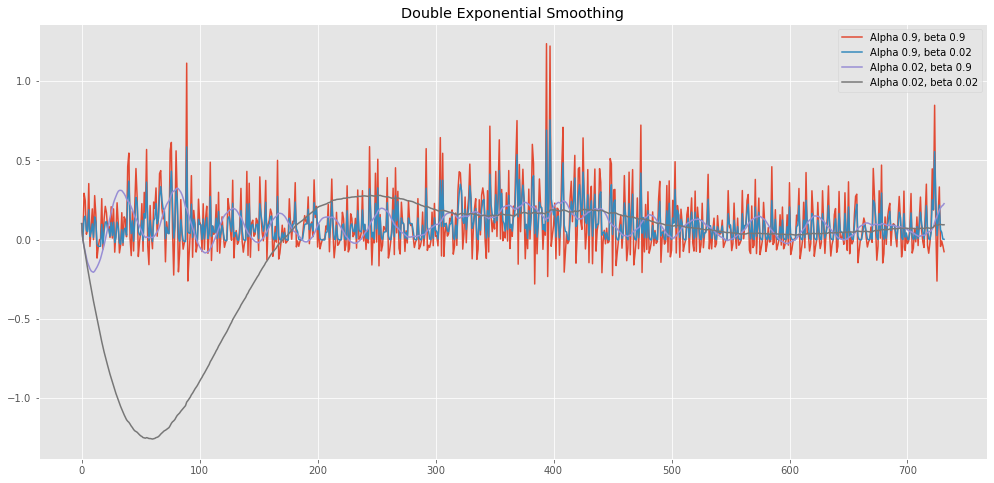

In [28]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
#     plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(aux.Sales, alphas=[0.9, 0.02], betas=[0.9, 0.02])

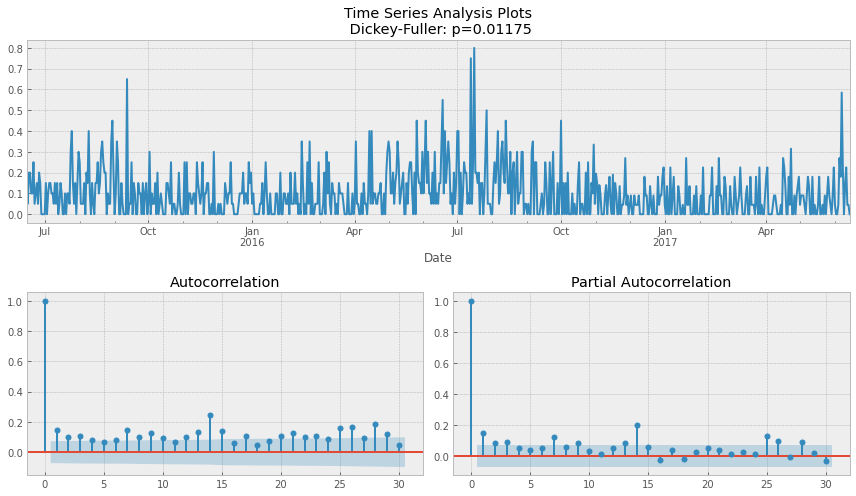

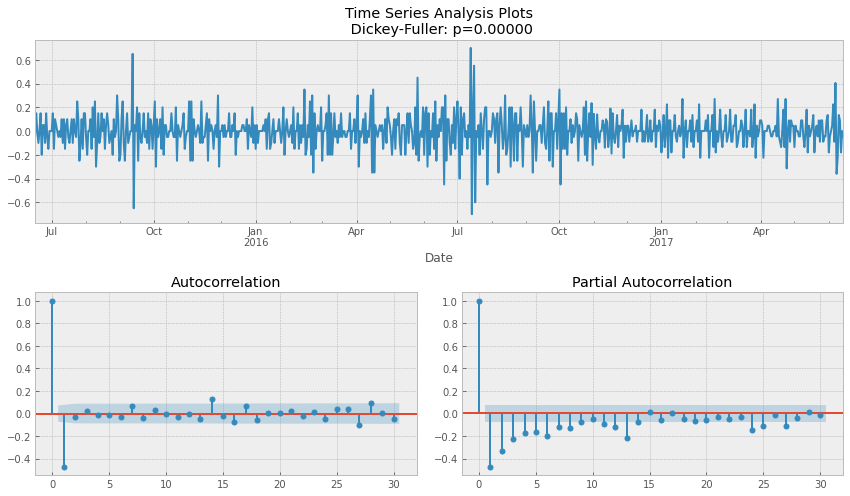

In [29]:
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(aux.Sales, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = aux.Sales - aux.Sales.shift(1)

tsplot(data_diff[1:], lags=30)

Link => https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775

Rusia: weather / holidays